In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv(r'C:\Users\jaraneses\OneDrive - 2X LLC\Codes\Portfolio Projects_storage\Day 14 - Loan Prediction\train_u6lujuX_CVtuZ9i (1).csv')

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
print(df.shape)

(614, 13)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
df.columns = df.columns.str.strip()

In [8]:
df.isnull().sum().sort_values(ascending= False)

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Education             0
Loan_ID               0
CoapplicantIncome     0
ApplicantIncome       0
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
df = df.dropna()

In [10]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [11]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [12]:
df.Property_Area.value_counts()

Property_Area
Semiurban    191
Urban        150
Rural        139
Name: count, dtype: int64

In [13]:

df['Dependents'] = df['Dependents'].replace(to_replace = '3+', value = 4).astype(int)
df['Credit_History'] = df['Credit_History'].astype(int)

df = df.replace(
    {'Married':{'No': 0, 'Yes': 1},
     'Gender':{'Male' : 1, 'Female' : 0},
     'Self_Employed' : {'No': 0, 'Yes': 1},
     'Property_Area' : {'Urban': 2, 'Semiurban': 1, 'Rural': 0},
     'Education' : {'Graduate': 1, 'Not Graduate': 0},
     'Self_Employed' : {'No': 0, 'Yes': 1},
     'Loan_Status' : {'N': 0, 'Y': 1}

    })

C:\Users\jaraneses\AppData\Local\Temp\ipykernel_9620\3956255715.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace(


In [14]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1,2,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1,2,1


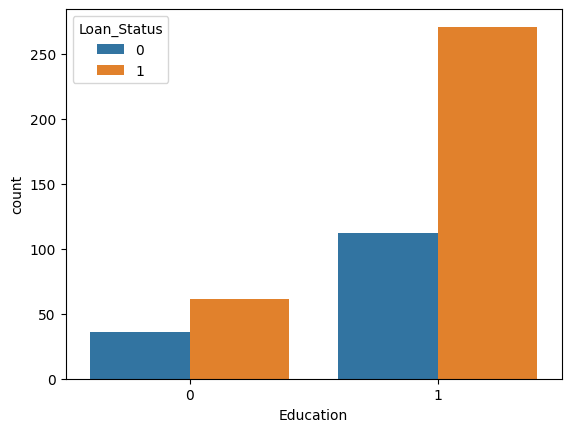

In [15]:
sns.countplot(x = 'Education', hue = 'Loan_Status', data = df)
plt.show()

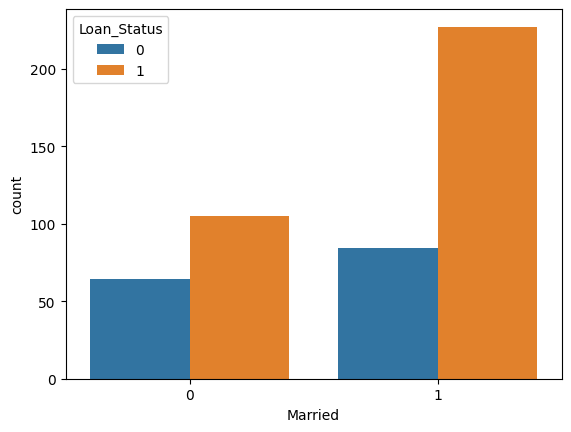

In [16]:
sns.countplot(x = 'Married', hue = 'Loan_Status', data = df)
plt.show()

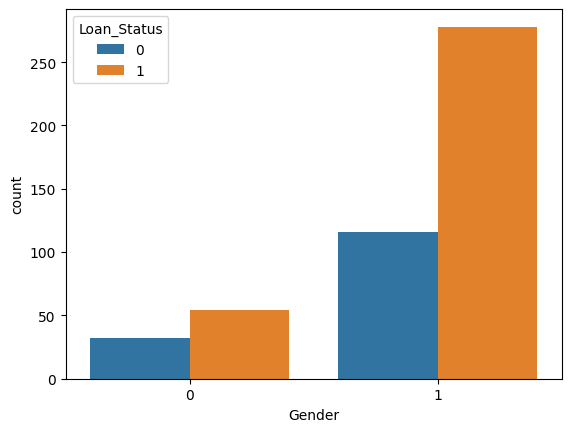

In [17]:
sns.countplot(x = 'Gender', hue = 'Loan_Status', data = df)
plt.show()

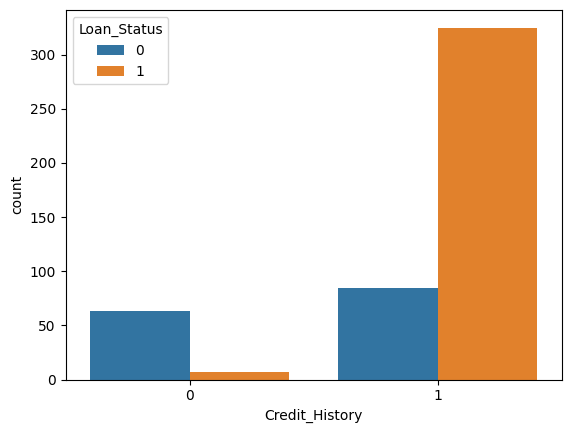

In [18]:
sns.countplot(x = 'Credit_History', hue = 'Loan_Status', data = df)
plt.show()

In [19]:
X = df.drop(columns = ['Loan_ID', 'Loan_Status'])
y = df['Loan_Status']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, stratify= y, random_state= 2)

In [21]:
num_cols = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']

scaler = StandardScaler()

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [22]:
(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(96, 11)
(384,)
(96,)


In [23]:
# Hyperparameters 

models ={
    'Logistic Regression':{
        'model' : LogisticRegression(),
        'params': {
                'C' : [ 0.1, 1, 10],
                'penalty': ['l2'],
                'solver' : ['liblinear']
        }
    },
    'SVM': {
        'model': SVC(),
        'params':{
                'C': [0.1, 1, 10, 100],
                'kernel': ['linear', 'rbf'],
                'gamma': ['scale', 'auto'],
                'class_weight': ['balanced']
        }
    },
    'Random Forest':{
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [200, 300, 500],
            'max_depth':[5, 8, 10, 15],
            'min_samples_split': [10, 20, 50],
            'min_samples_leaf': [2, 5, 10],
            'max_features': ['sqrt', 'log2'],
            'class_weight' : ['balanced']
        }
    }
    
}


In [24]:
results = {}

for name, config in models.items():
    grid_search = GridSearchCV(
        config['model'],
        config['params'],
        cv=5,
        scoring='f1',
        n_jobs=-1
    )

    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_

    train_pred = best_model.predict(X_train)
    test_pred = best_model.predict(X_test)

    results[name] = {
        'best_params': grid_search.best_params_,
        'train_accuracy': accuracy_score(y_train, train_pred),
        'test_accuracy': accuracy_score(y_test, test_pred),
        'model': best_model
    }

    print(f"\n{name}")
    print(f"  Best params: {grid_search.best_params_}")
    print(f"  Train accuracy: {results[name]['train_accuracy']:.4f}")
    print(f"  Test accuracy: {results[name]['test_accuracy']:.4f}")

# After loop: summary
print("\n=== Summary ===")
for n, r in results.items():
    print(f"{n}: Train={r['train_accuracy']:.4f}, Test={r['test_accuracy']:.4f}")



Logistic Regression
  Best params: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
  Train accuracy: 0.8073
  Test accuracy: 0.8229

SVM
  Best params: {'C': 0.1, 'class_weight': 'balanced', 'gamma': 'scale', 'kernel': 'linear'}
  Train accuracy: 0.8047
  Test accuracy: 0.8229

Random Forest
  Best params: {'class_weight': 'balanced', 'max_depth': 5, 'max_features': 'log2', 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 500}
  Train accuracy: 0.8724
  Test accuracy: 0.7708

=== Summary ===
Logistic Regression: Train=0.8073, Test=0.8229
SVM: Train=0.8047, Test=0.8229
Random Forest: Train=0.8724, Test=0.7708


In [25]:
summary = pd.DataFrame([
    {
        'Model': name,
        'Best Params': r['best_params'],
        'Train Accuracy': r['train_accuracy'],
        'Test Accuracy': r['test_accuracy']
    }
    for name, r in results.items()
])

print(summary.to_string(index=False))

              Model                                                                                                                               Best Params  Train Accuracy  Test Accuracy
Logistic Regression                                                                                          {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}        0.807292       0.822917
                SVM                                                              {'C': 0.1, 'class_weight': 'balanced', 'gamma': 'scale', 'kernel': 'linear'}        0.804688       0.822917
      Random Forest {'class_weight': 'balanced', 'max_depth': 5, 'max_features': 'log2', 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 500}        0.872396       0.770833
